In [1]:
# 加载包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

In [2]:
# 查看目录下的文件
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\data.csv


## 0. 加载数据

In [3]:
# 加载数据
data_set = pd.read_csv('./data/data.csv')

In [4]:
data_set_copy = data_set.copy()

In [5]:
# 查看数据sample
data_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# 查看数据条数
print(data_set.shape)

(1460, 81)


In [7]:
# 查看数据类型
data_set.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# 查看数据信息
data_set.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

d:\programdata\miniconda3\envs\torch-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


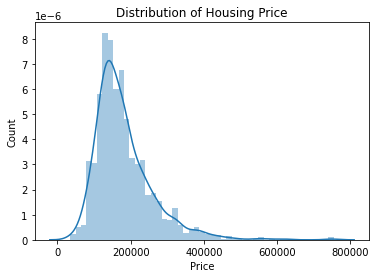

In [9]:
# 画条形图
fig, ax = plt.subplots()
sns.distplot(data_set['SalePrice'])
ax.set_xlabel('Price')
ax.set_ylabel('Count')
ax.set_title('Distribution of Housing Price')
fig.savefig('./hist_price.jpg')

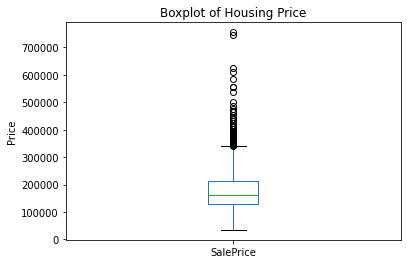

In [10]:
# 画条形图
fig, ax = plt.subplots()
data_set['SalePrice'].plot.box()
ax.set_ylabel('Price')
ax.set_title('Boxplot of Housing Price')
fig.savefig('./box_price.jpg')

## 1. 数据清洗

In [11]:
# 查看数据的缺失情况
data_set.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [12]:
# 获取有缺失值的列
columns_having_null = data_set[data_set.columns[data_set.isnull().sum()>0]]
columns_having_null

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [13]:
# 查看缺失值的数据类型
columns_having_null.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [14]:
# 查看有缺失值的列的数目
columns_having_null.isnull().sum(axis = 0)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
# 剔除缺失值太多的列
data_set.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [16]:
print(data_set.shape)

(1460, 76)


In [17]:
# 进行特征的相关性分析
## 计算相关性矩阵
corr_matrix_all = data_set.corr()

## 提取SalePrice与其他特征的相关系数
corr_price = corr_matrix_all.loc['SalePrice', :]
corr_price = corr_price.sort_values()
print(corr_price)

list(corr_price.index)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

['KitchenAbvGr',
 'EnclosedPorch',
 'MSSubClass',
 'OverallCond',
 'YrSold',
 'LowQualFinSF',
 'Id',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2',
 '3SsnPorch',
 'MoSold',
 'PoolArea',
 'ScreenPorch',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'BsmtFullBath',
 'LotArea',
 'HalfBath',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'LotFrontage',
 'BsmtFinSF1',
 'Fireplaces',
 'MasVnrArea',
 'GarageYrBlt',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

In [18]:
x = list(corr_price.index)
y = list(corr_price.values)
data = {'index':x, 'values':y}

In [19]:
data

{'index': ['KitchenAbvGr',
  'EnclosedPorch',
  'MSSubClass',
  'OverallCond',
  'YrSold',
  'LowQualFinSF',
  'Id',
  'MiscVal',
  'BsmtHalfBath',
  'BsmtFinSF2',
  '3SsnPorch',
  'MoSold',
  'PoolArea',
  'ScreenPorch',
  'BedroomAbvGr',
  'BsmtUnfSF',
  'BsmtFullBath',
  'LotArea',
  'HalfBath',
  'OpenPorchSF',
  '2ndFlrSF',
  'WoodDeckSF',
  'LotFrontage',
  'BsmtFinSF1',
  'Fireplaces',
  'MasVnrArea',
  'GarageYrBlt',
  'YearRemodAdd',
  'YearBuilt',
  'TotRmsAbvGrd',
  'FullBath',
  '1stFlrSF',
  'TotalBsmtSF',
  'GarageArea',
  'GarageCars',
  'GrLivArea',
  'OverallQual',
  'SalePrice'],
 'values': [-0.13590737084214105,
  -0.1285779579259566,
  -0.08428413512659509,
  -0.07785589404867797,
  -0.028922585168736813,
  -0.02560613000067955,
  -0.021916719443430967,
  -0.021189579640303213,
  -0.01684415429735895,
  -0.011378121450215146,
  0.04458366533574838,
  0.046432245223819446,
  0.09240354949187318,
  0.11144657114291112,
  0.16821315430073963,
  0.21447910554696928,
  0

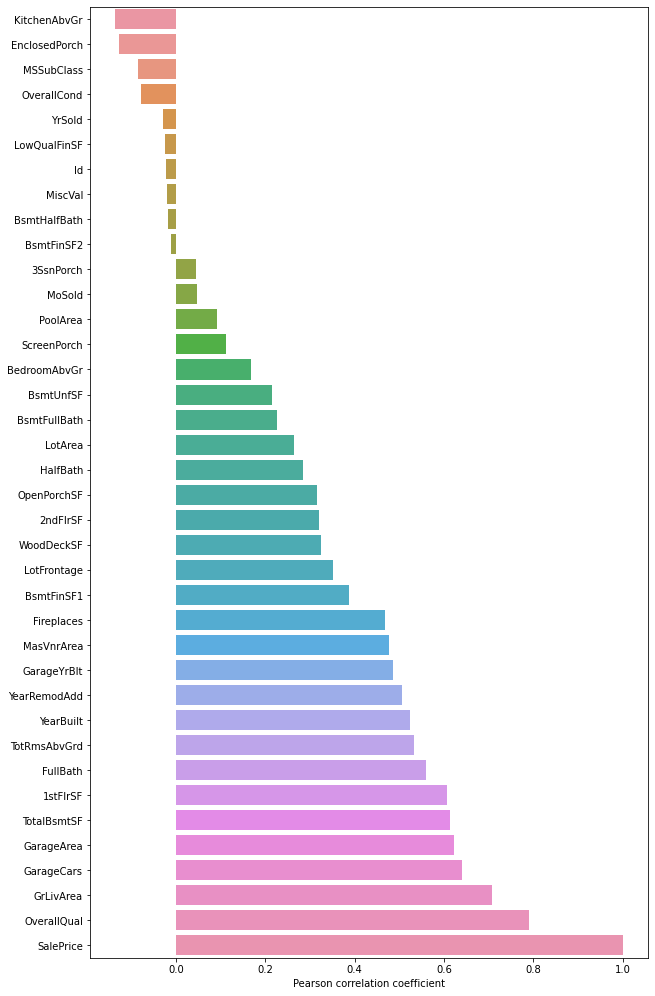

In [20]:
plt.figure(figsize=(10, 0.25*70))
sns.barplot(x = 'values', y = 'index', data = data)
plt.xlabel('Pearson correlation coefficient')
plt.savefig('./pearson.png')

In [21]:
# 获取 X 和 y (SalePrice)
y = data_set['SalePrice']
X = data_set.drop(['SalePrice'], axis = 1)

In [22]:
# 查看 X 缺失值的类型
X[X.columns[X.isnull().sum() > 0]].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [23]:
# 进行缺失值填充
X['LotFrontage'].fillna(X['LotFrontage'].mean(), inplace=True) # 均值填充
X['MasVnrType'].fillna("None", inplace=True)
X['MasVnrArea'].fillna(0, inplace=True)

X['BsmtQual'].fillna("TA", inplace=True)
X['BsmtCond'].fillna("No", inplace=True)
X['BsmtExposure'].fillna("NB", inplace=True)
X['BsmtFinType1'].fillna("NB", inplace=True)
X['BsmtFinType2'].fillna("Unf", inplace=True)
X['Electrical'].fillna("Sbrkr", inplace=True)

X['GarageType'].fillna("No", inplace=True)
X['GarageYrBlt'].fillna(0, inplace=True)
X['GarageFinish'].fillna("No", inplace=True)
X['GarageQual'].fillna("No", inplace=True)
X['GarageCond'].fillna("No", inplace=True)

In [24]:
# 查看 X 缺失值的类型
X[X.columns[X.isnull().sum() > 0]].dtypes
# 没有缺失值了，剔除掉 id列
X.drop(columns = ['Id'], axis = 1, inplace = True)

## 2. 特征筛选与编码

In [25]:
# 提取浮点类型特征
float_features = X[X.columns[X.dtypes == 'float']]
print(float_features.columns)

# 提取整型特征
int_features = X[X.columns[X.dtypes == 'int64']]
print(int_features.columns)

# 提取object类型特征
object_features = X[X.columns[X.dtypes == 'object']]
print(object_features.columns)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC',

In [26]:
## 获取相关性矩阵，剔除掉相关性太强的特征对中的一个
corr_matrix = X.corr()
print(corr_matrix)
print("===============================\n")

## 因为是对称矩阵，所以我们可以只取对角元的元素
## 将对角线及其下三角部分置为 NaN
upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
print(upper_matrix)
print("===============================\n")

## 剔除掉相关性大于0.8的特征（中的一个）
columns_need_todrop = [col for col in upper_matrix.columns if any(upper_matrix[col] > 0.8)]
print(columns_need_todrop)
X.drop(columns = columns_need_todrop, axis = 1, inplace = True)
X.head()

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.082746  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178699  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808   

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [27]:
## 对object特征进行编码
from sklearn.preprocessing import LabelEncoder

for idx in object_features:
    label = LabelEncoder()
    label.fit(X[idx].values)
    X[idx] = label.transform(X[idx].values)

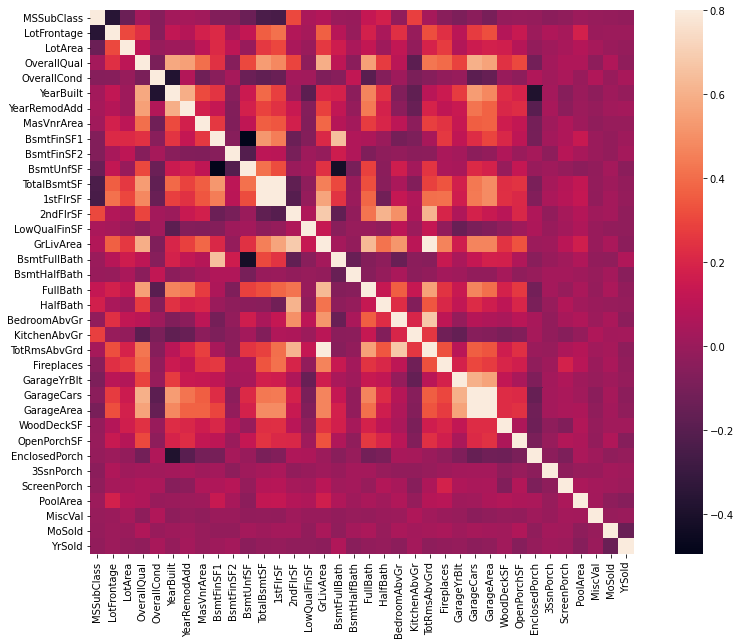

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
## 画出相关性矩阵
corr_matrix_processed = X.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, vmax = .8, square = True)

plt.savefig('./processed_corr_heatmap.png')

## 3. 模型拟合与测试

In [29]:
# 数据归一化
# from sklearn import preprocessing

# names = X.columns
# X_preprocessed = preprocessing.normalize(X)
# X_scaled = pd.DataFrame(X_preprocessed, columns=names)

In [31]:
# 划分训练集和测试集
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

regr_naive = make_pipeline(StandardScaler(), LinearRegression()) # OLS
regr_enet = make_pipeline(StandardScaler(), ElasticNet()) # ElasticNet
regr_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, max_iter = 1e5)) # Lasso
regr_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1)) # Ridge

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
# 模型训练
regr_naive.fit(train_x, train_y)
regr_enet.fit(train_x, train_y)
regr_lasso.fit(train_x, train_y)
regr_ridge.fit(train_x, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [33]:
# 训练结果评估 R square score

## OlS
print("OLS score =", regr_naive.score(train_x, train_y))

## ElasticNet
print("ElasticNet score =", regr_enet.score(train_x, train_y))

## Lasso
print("Lasso score =", regr_lasso.score(train_x, train_y))

## Ridge
print("Ridge score =", regr_ridge.score(train_x, train_y))

OLS score = 0.8425548259335432
ElasticNet score = 0.8231428847200593
Lasso score = 0.8425418843166057
Ridge score = 0.8425404571975534


In [34]:
# 测试结果评估 MAE, MSE, R-square
prediction_naive = regr_naive.predict(test_x)
print("MAE of OLS =", mean_absolute_error(prediction_naive, test_y))

prediction_enet = regr_enet.predict(test_x)
print("MAE of Elastic Net =", mean_absolute_error(prediction_enet, test_y))

prediction_lasso = regr_lasso.predict(test_x)
print("MAE of Lasso =", mean_absolute_error(prediction_lasso, test_y))

prediction_ridge = regr_ridge.predict(test_x)
print("MAE of Ridge =", mean_absolute_error(prediction_ridge, test_y))

MAE of OLS = 21800.579435861073
MAE of Elastic Net = 20588.961765393895
MAE of Lasso = 21794.70844515992
MAE of Ridge = 21785.88458021276


In [35]:
print("RMSE of OLS =", np.sqrt(mean_squared_error(prediction_naive, test_y)))

prediction_enet = regr_enet.predict(test_x)
print("RMSE of Elastic Net =", np.sqrt(mean_squared_error(prediction_enet, test_y)))

prediction_lasso = regr_lasso.predict(test_x)
print("RMSE of Lasso =", np.sqrt(mean_squared_error(prediction_lasso, test_y)))

prediction_ridge = regr_ridge.predict(test_x)
print("RMSE of Ridge =", np.sqrt(mean_squared_error(prediction_ridge, test_y)))

RMSE of OLS = 32717.910162752418
RMSE of Elastic Net = 33312.85897181661
RMSE of Lasso = 32717.807009996108
RMSE of Ridge = 32710.02038533079
